## 拿取資料

In [288]:
from finlab.data import Data

data = Data()

twii = data.get("發行量加權股價指數")
twii = twii['台股指數']
twii = twii.resample("60T").first().dropna()

In [289]:
twii

date
2006-01-02 09:00:00    6548.3400
2006-01-02 10:00:00    6480.5000
2006-01-02 11:00:00    6431.0800
2006-01-02 12:00:00    6460.3800
2006-01-02 13:00:00    6449.7800
                         ...    
2022-04-01 09:00:00   17693.4700
2022-04-01 10:00:00   17562.8900
2022-04-01 11:00:00   17551.4400
2022-04-01 12:00:00   17559.3200
2022-04-01 13:00:00   17559.0000
Name: 台股指數, Length: 20030, dtype: float64

## 製作 features

### 第一種方法

In [51]:
import talib
import pandas as pd

rsi = talib.RSI(twii, timeperiod=14)
k, d = talib.STOCH(twii, twii, twii)

dataset = pd.DataFrame({
    'rsi':rsi,
    'k':k,
    'd':d,
})

feature_names = dataset.columns

dataset['return'] = twii.shift(-10)/twii > 1

### 第二種方法(適合新手)

In [22]:
import finlab.ml as ml

twii_df = pd.DataFrame({
    'open':twii,
    'high':twii,
    'low':twii,
    'close':twii,
})

indicators = ['STOCH', 'RSI', 'ADXR']
multiplier = [1, 5, 10, 20, 30, 50, 60]

dataset = ml.talib_features(twii_df, indicators, multiplier)
feature_names = list(dataset.columns[:-1])

dataset['return'] = twii.shift(-10)/twii

In [290]:
import talib
import numpy as np
import pandas as pd

sma = talib.SMA(twii, timeperiod=120)
ema = talib.EMA(twii, timeperiod=120)
wma = talib.WMA(twii, timeperiod=120)
mom = talib.MOM(twii, timeperiod=120)
k, d = talib.STOCH  (twii, twii, twii, fastk_period=120, slowk_period=60, slowd_period=60)
k2, d2 = talib.STOCH(twii, twii, twii, fastk_period=240, slowk_period=120, slowd_period=120)
k3, d3 = talib.STOCH(twii, twii, twii, fastk_period=360, slowk_period=180, slowd_period=180)
k4, d4 = talib.STOCH(twii, twii, twii, fastk_period=480, slowk_period=240, slowd_period=240)
k5, d5 = talib.STOCH(twii, twii, twii, fastk_period=640, slowk_period=320, slowd_period=320)
k6, d6 = talib.STOCH(twii, twii, twii, fastk_period=720, slowk_period=360, slowd_period=360)
k7, d7 = talib.STOCH(twii, twii, twii, fastk_period=840, slowk_period=420, slowd_period=420)
k8, d8 = talib.STOCH(twii, twii, twii, fastk_period=960, slowk_period=480, slowd_period=480)

rsi = talib.RSI (twii, timeperiod=120)
rsi2 = talib.RSI(twii, timeperiod=240)
rsi3 = talib.RSI(twii, timeperiod=480)
rsi4 = talib.RSI(twii, timeperiod=640)
rsi5 = talib.RSI(twii, timeperiod=720)
rsi6 = talib.RSI(twii, timeperiod=840)

macd1, macd2, macd3 = talib.MACD(twii, fastperiod=120, slowperiod=60, signalperiod=60)
willr = talib.WILLR(twii, twii, twii, timeperiod=120)
cci = talib.CCI(twii, twii, twii, timeperiod=120)

dataset = pd.DataFrame({
    #'SMA':sma,
    #'EMA':ema,
    #'WMA':wma,
    #'MOM':mom,
    #'WILLR':willr,
    #'CCI':cci,
    'MACD1':macd1,
    #'MACD2':macd2,
    'RSIb': rsi / 50,
    'RSIb2': rsi2 / 50,
    'RSIb3': rsi3 / 50,
    'RSIb4': rsi4 / 50,
    'RSIb5': rsi5 / 50,
    'RSIb6': rsi6 / 50,
    'KDb': k - d,
    'KDb2': k2 - d2,
    'KDb3': k3 - d3,
    'KDb4': k4 - d4,
    'KDb5': k5 - d5,
    'KDb6': k6 - d6,
    'KDb7': k7 - d7,
    'KDb8': k8 - d8,
    
    'a5':   (twii.rolling(5).mean()   / twii),
    #'a10':  (twii.rolling(10).mean()  / twii),
    'a20':  (twii.rolling(20).mean()  / twii),
    'a40':  (twii.rolling(40).mean()  / twii),
    'a80':  (twii.rolling(80).mean()  / twii),
    'a160': (twii.rolling(160).mean() / twii),
    'a320': (twii.rolling(320).mean() / twii),
    'a640': (twii.rolling(640).mean() / twii),
    'a720': (twii.rolling(720).mean() / twii),
    'a840': (twii.rolling(840).mean() / twii),
    #'a960': (twii.rolling(960).mean() / twii),
    'a1024':(twii.rolling(1024).mean() / twii),
    'b1': twii/twii.shift(50),
    'b2': twii/twii.shift(100),
    'b3': twii/twii.shift(150),
    'b4': twii/twii.shift(200),
    'b5': twii/twii.shift(250),
    'b6': twii/twii.shift(300),
    'b7': twii/twii.shift(350),
    'LS0': talib.LINEARREG_SLOPE(twii, 60),
    'LS1': talib.LINEARREG_SLOPE(twii, 120),

    'ADXR0': talib.ADXR(twii, twii, twii, 60),
    'ADXR1': talib.ADXR(twii, twii, twii, 120),
    'ADXR2': talib.ADXR(twii, twii, twii, 240),
    'ADXR3': talib.ADXR(twii, twii, twii, 360),
    'ADXR4': talib.ADXR(twii, twii, twii, 480),
    'ADXR5': talib.ADXR(twii, twii, twii, 640),
    
    #'ADX': talib.ADX(twii, twii, twii, 120),
    #'ATR': talib.ADX(twii, twii, twii, 120),

    'return': twii.shift(-10) - twii
})

feature_names = list(dataset.columns[:-1])

In [92]:
dataset = dataset.dropna()

## 訓練

In [102]:
feature_names = list(dataset.columns)
len(feature_names)

41

In [291]:
date_arr = dataset.index.get_level_values('date') < '2018'
dataset_train = dataset[date_arr]
dataset_test = dataset[~date_arr]

In [ ]:
import lightgbm

fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'auc', 
            "eval_set" : [test],
            'eval_names': ['valid'],
            'verbose': 100,
            'categorical_feature': 'auto'}

from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

#This parameter defines the number of HP points to be tested
n_HP_points_to_test = 100

import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
clf = lgb.LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=5000)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=n_HP_points_to_test,
    scoring='roc_auc',
    cv=3,
    refit=True,
    random_state=314,
    verbose=True)

dataset_train = dataset[:'2015'].dropna()
train = (dataset_train[feature_names], dataset_train['return'])

gs.fit(*train, **fit_params)

In [ ]:
gs.best_estimator_

In [32]:
import lightgbm as lgb

cf = lgb.LGBMClassifier(n_estimators=100)

dataset_train = dataset[:'2015']
dataset_test = dataset['2016':'2021']


train = (dataset_train[feature_names], dataset_train['return'] > 1)
test = (dataset_test[feature_names], dataset_test['return'] > 1)

cf.fit(*train)
cf.score(*test)


[LightGBM] [Info] Number of positive: 65403, number of negative: 69134
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031759 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10455
[LightGBM] [Info] Number of data points in the train set: 134537, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.486134 -> initscore=-0.055479
[LightGBM] [Info] Start training from score -0.055479
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

0.998922467178598

In [33]:
(dataset_test['return'] ).sum() / len(dataset_test)

1.2467893237552639

## 測試哪些feature重要

In [34]:
importance = pd.DataFrame(sorted(zip(feature_names, cf.feature_importances_)), columns=['feature_name', 'importance'])
importance.sort_values("importance", ascending=False)
importance

,feature_name,importance
0,ADXR0,80
1,ADXR1,78
2,ADXR2,92
3,ADXR3,98
4,ADXR4,65
5,ADXR5,80
6,KDb,72
7,KDb2,79
8,KDb3,71
9,KDb4,56


<AxesSubplot:xlabel='importance', ylabel='feature_name'>

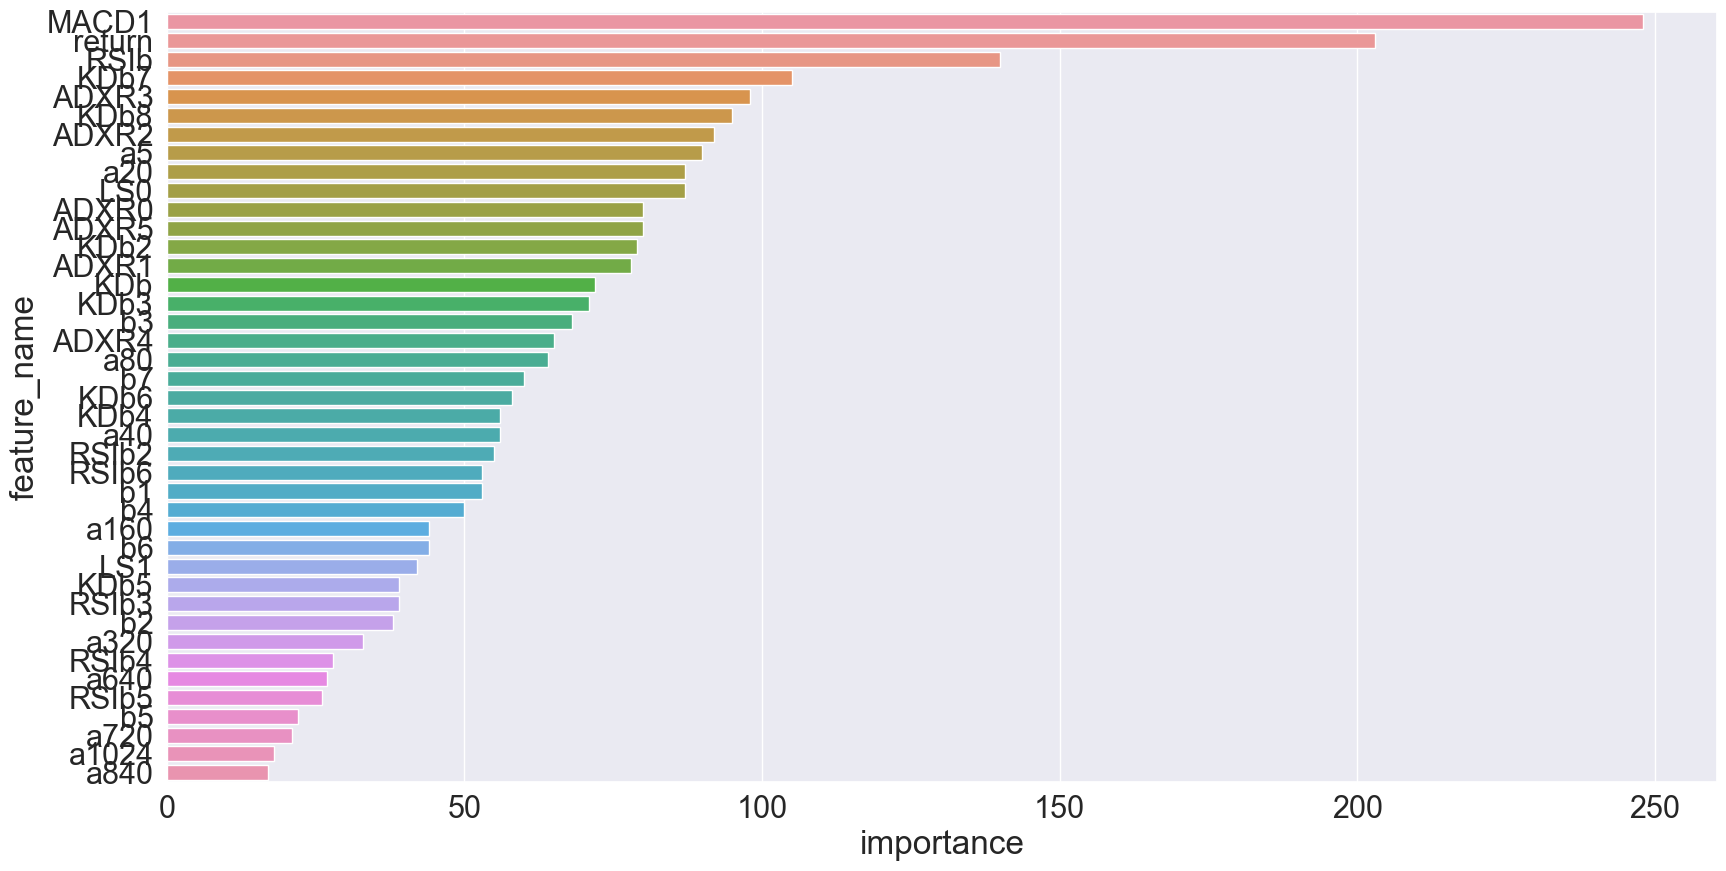

In [35]:
importance = pd.DataFrame(sorted(zip(feature_names, cf.feature_importances_)), columns=['feature_name', 'importance'])
importance.sort_values("importance", ascending=False)
importance

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 10))
labels = importance['feature_name']
colors = sns.color_palette('pastel')
sns.barplot(x="importance", y="feature_name", data=importance.sort_values(by="importance", ascending=False))
#plt.pie(importance['importance'], colors = colors)

## 回測一下

In [36]:
prediction = cf.predict_proba(dataset[feature_names])
prediction = prediction.swapaxes(0, 1)[1]
prediction = pd.Series(prediction, dataset.index)

In [37]:
hold = (prediction > 0.6).rolling(5).sum() > 0
hold

date
2006-02-27 13:00:00    False
2006-02-27 13:05:00    False
2006-02-27 13:10:00    False
2006-02-27 13:15:00    False
2006-02-27 13:20:00     True
                       ...  
2022-04-01 12:20:00     True
2022-04-01 12:25:00     True
2022-04-01 12:30:00     True
2022-04-01 12:35:00     True
2022-04-01 12:40:00     True
Length: 218402, dtype: bool

## 手續費+滑價

In [38]:
hold.astype(int).diff().abs()['2016':'2021'].sum() * 3

15795.0

113712.08999999988

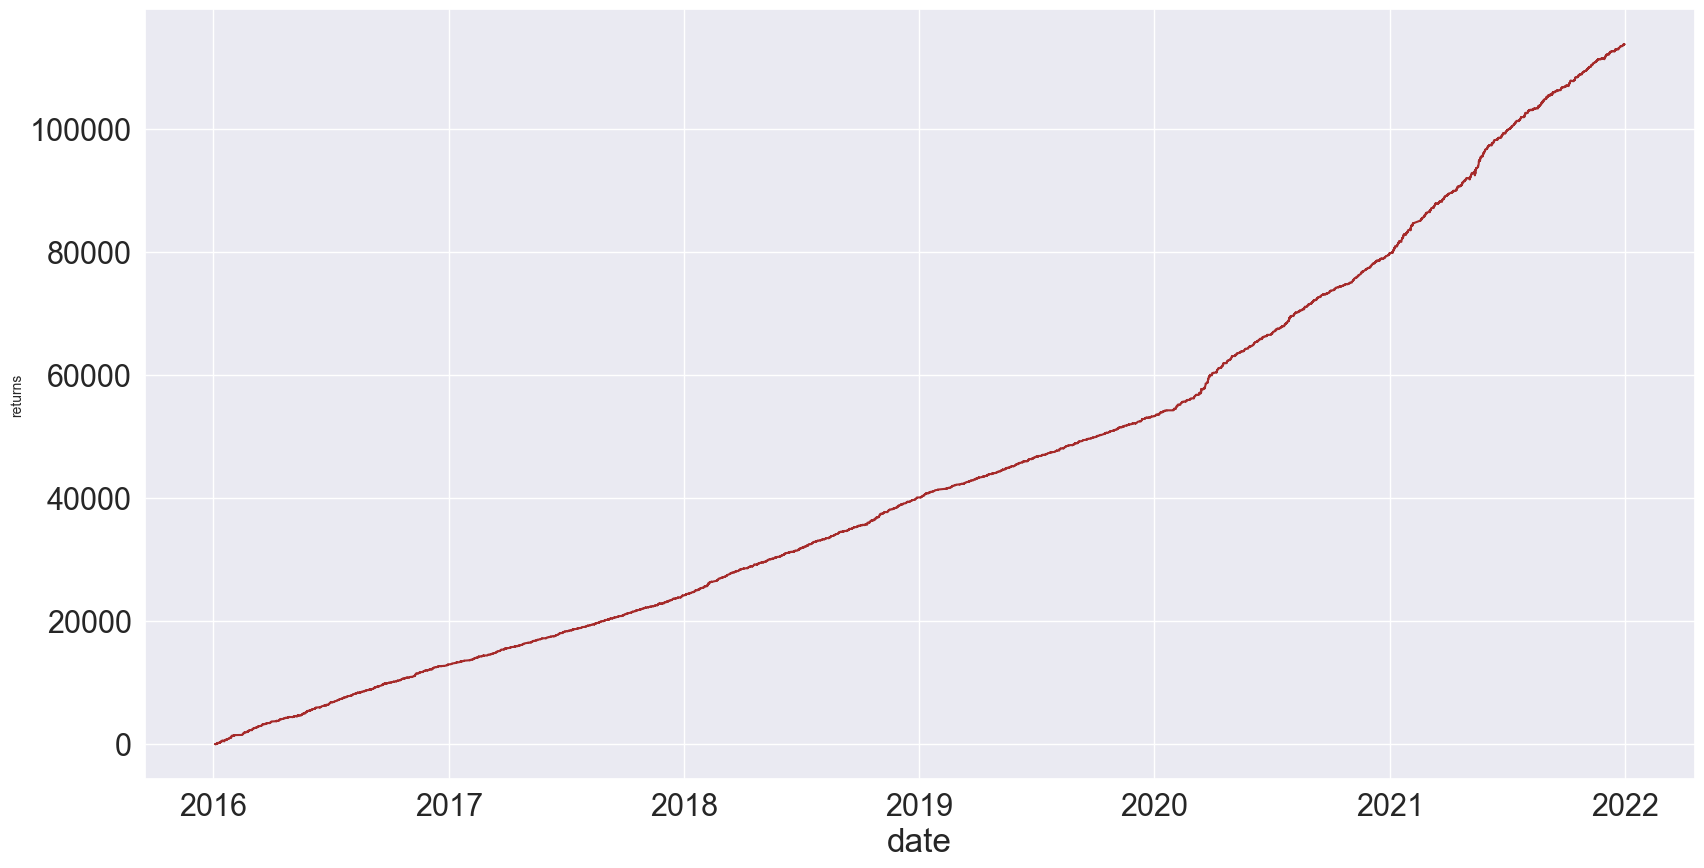

In [39]:
hold = (prediction > 0.6).rolling(5).sum() > 0
plt.figure(figsize=(20, 10))
returns = twii.shift(-1) - twii
data = returns['2016':'2021'][hold==True].cumsum()
sns.set_style("whitegrid")
sns.set(font_scale = 2)
p = sns.lineplot(data=data, color='brown')
p.set_ylabel("returns", fontsize = 10)
data[-1]

In [17]:
hold_count = hold['2016':'2021'].sum()

samples = []
import numpy as np
for i in range(1000):
    ret = (np.random.choice(returns['2016':'2021'].dropna(), hold_count).sum())
np.random.choice(returns['2016':'2021'].dropna(), hold_count)

array([-5.44, -0.37, -2.89, ...,  0.99, -3.06, -6.47])

C:\Users\USER\anaconda3\envs\Python_3.7\lib\site-packages\ipykernel_launcher.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if sys.path[0] == "":


<AxesSubplot:>

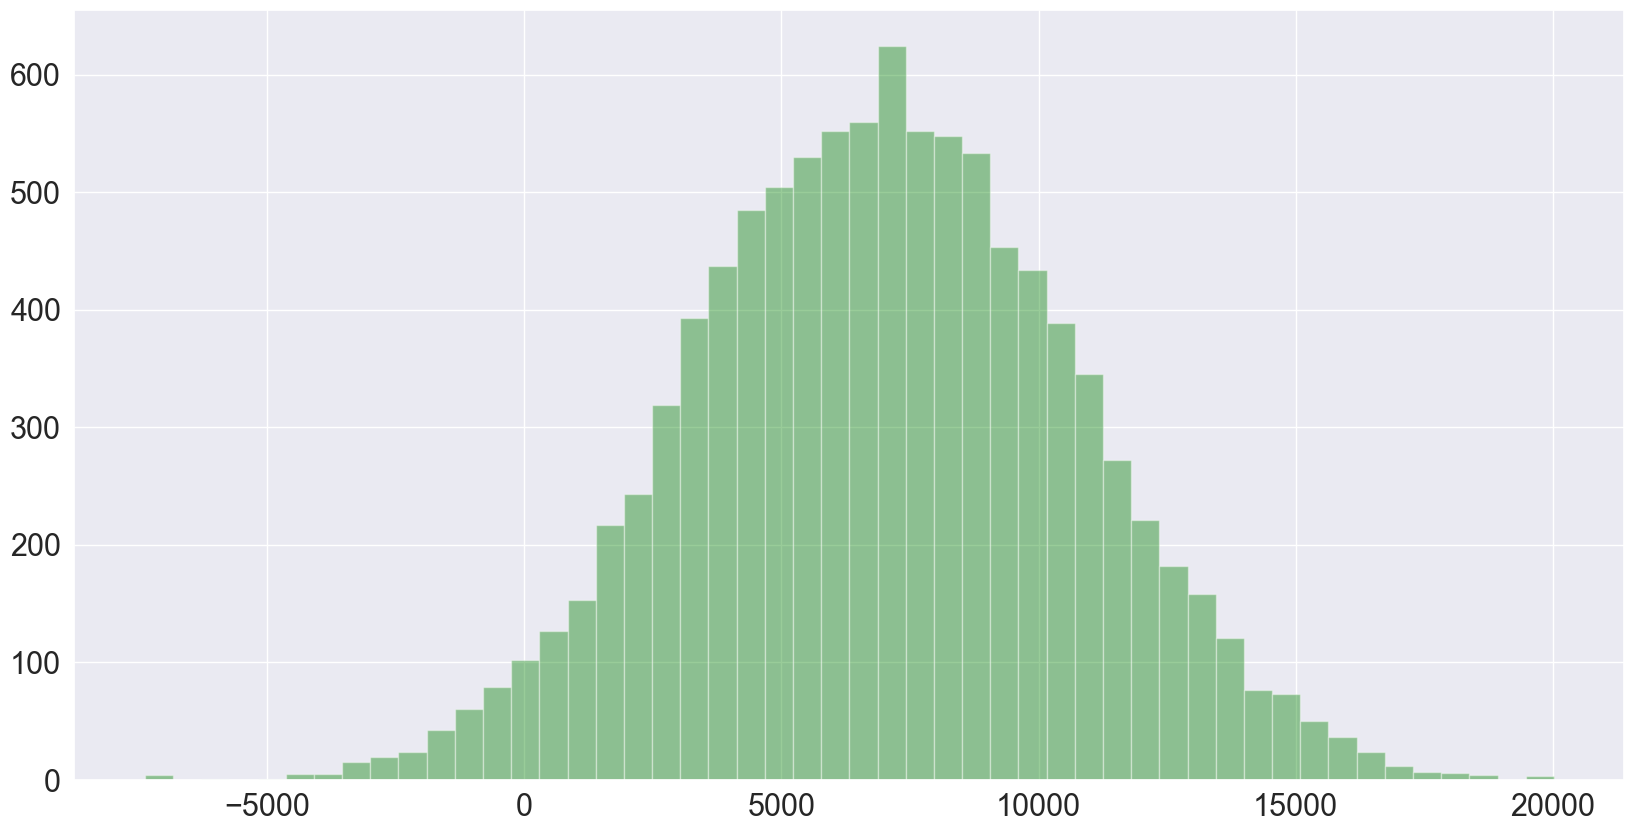

In [40]:
hold_count = hold['2016':'2021'].sum()

samples = []
import numpy as np
for i in range(10000):
    ret = (np.random.choice(returns['2016':'2021'].dropna(), hold_count).sum())
    samples.append(ret)
plt.figure(figsize=(20, 10))
#pd.Series(samples).hist()
sns.set_style("darkgrid")
sns.set(font_scale = 2)
sns.distplot(samples, kde=False, color='green')
#sns.barplot(samples.sum().index,samples.sum().values)
#sns.palplot(sns.color_palette("Blues"))

In [42]:
(pd.Series(samples) > 12500).sum() / len(samples)

0.0698

## 製作指標feature

In [292]:
import random
import numpy as np
import tensorflow as tf

seed = 42
random.seed(seed)
np.random.seed(seed)
tf.compat.v1.set_random_seed(seed)


In [327]:
from datetime import datetime
y_symbol = "^TWII" # 股票代碼 ^TWII 台灣加權指數 美股蘋果 AAPL 台股台積電 2330.TW
startdate = datetime(2006,1,2) # 訓練起始日期
enddate = datetime(2017,12,31) # 訓練結束日期
漲幅  = 1.03 # 漲3%出場
跌幅 = 0.98 # 跌3%出場
持有時間 = 35 #預期要持有多長時間

In [294]:
import numpy as np
import math
def triple_barrier_signal(price,ub,lb,t):
    '''
    triple-barrier包含2個horizontal barrier，1個vertical barrier。
    首先解釋一下這3个barrier：
    根據3个barrier中第一個被touch的進行label
    barrier 1 (the upper barrier)首先達到，label 1
    barrier 2（the lower barrier)首先達到，label -1
    如果barrier 1和barrier 2都没有達到，则barrier 3達到，label 0
    '''
    signal = []
    for i in range(len(price)-t):
    # 情況1.如果price[i:i+t+1]這段序列有任何元素的值大於price[i]*ub則signal[i] = 1
        if max(price[i:i+t+1]) > price[i] * ub:
            signal.append(1)
    # 情況2.如果price[i:i+t+1]這段序列有任何元素的值低於price[i]*lb則signal[i] = -1
        elif min(price[i:i+t+1]) < price[i] * lb:
            signal.append(-1)
    # 如果以上情況1和情況2都沒有發生則signal[i] = 0
        else:
            signal.append(0)
    return signal

ret = triple_barrier_signal(twii[date_arr].values.tolist(),漲幅,跌幅,持有時間)
df = dataset.head(len(ret))
features = list(df.columns)
df['triple_barrier_signal'] = ret
df = df.dropna()

C:\Users\USER\anaconda3\envs\Python_3.7\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [295]:
y_name = 'triple_barrier_signal' #當作labels
#df = df[features+[y_name]]
df

,MACD1,RSIb,RSIb2,RSIb3,RSIb4,RSIb5,RSIb6,KDb,KDb2,KDb3,...,LS0,LS1,ADXR0,ADXR1,ADXR2,ADXR3,ADXR4,ADXR5,return,triple_barrier_signal
date,,,,,,,,,,,,,,,,,,,,,
2007-07-24 12:00:00,227.8791,1.3082,1.2409,1.1725,1.1459,1.1352,1.1221,1.6133,1.3806,3.4036,...,6.4579,7.9210,27.1306,15.5272,9.6441,7.7966,6.1943,4.5794,-79.9000,-1
2007-07-24 13:00:00,228.1357,1.2829,1.2278,1.1660,1.1411,1.1310,1.1185,1.5126,1.3601,3.3419,...,6.3409,7.9661,27.2030,15.6283,9.6607,7.8131,6.2013,4.5875,-49.1700,-1
2007-07-25 09:00:00,229.2767,1.2984,1.2370,1.1712,1.1452,1.1347,1.1217,1.4680,1.3431,3.2974,...,6.3395,8.0438,27.3298,15.7362,9.6830,7.8300,6.2094,4.5964,-177.6400,-1
2007-07-25 10:00:00,229.2588,1.2717,1.2230,1.1642,1.1400,1.1301,1.1179,1.3019,1.2901,3.2347,...,6.3514,8.0942,27.4133,15.8317,9.7019,7.8453,6.2166,4.6051,-363.1400,-1
2007-07-25 11:00:00,229.2018,1.2730,1.2238,1.1646,1.1404,1.1304,1.1181,1.1468,1.2419,3.1832,...,6.3512,8.1404,27.5109,15.9251,9.7204,7.8600,6.2241,4.6138,-324.5900,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-20 09:00:00,-55.7130,0.9359,0.9810,1.0197,1.0295,1.0321,1.0342,-12.2789,-23.9235,-12.9772,...,-0.6586,-3.3136,10.0355,7.5449,6.6542,7.2685,6.6655,5.2180,21.6300,0
2017-12-20 10:00:00,-55.1828,0.9464,0.9863,1.0223,1.0314,1.0338,1.0357,-11.7139,-23.9312,-13.2562,...,-0.4418,-3.3484,9.9927,7.5045,6.6475,7.2615,6.6634,5.2187,10.0200,0
2017-12-20 11:00:00,-54.5552,0.9493,0.9877,1.0230,1.0320,1.0343,1.0361,-11.2509,-23.9458,-13.5279,...,-0.1651,-3.3749,9.9394,7.4632,6.6403,7.2531,6.6613,5.2194,3.6400,0


In [296]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pickle
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
df_minmax = df.copy()
df_minmax[features] = min_max_scaler.fit_transform(df_minmax[features])#縮放到0-1之間
with open('./scaler1.pkl', 'wb') as f:
    pickle.dump(min_max_scaler, f)
df_minmax = pd.DataFrame(df_minmax, columns=df.columns, index=df.index) 

In [297]:
df_minmax

,MACD1,RSIb,RSIb2,RSIb3,RSIb4,RSIb5,RSIb6,KDb,KDb2,KDb3,...,LS0,LS1,ADXR0,ADXR1,ADXR2,ADXR3,ADXR4,ADXR5,return,triple_barrier_signal
date,,,,,,,,,,,,,,,,,,,,,
2007-07-24 12:00:00,0.9426,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.5263,0.5117,0.5586,...,0.7284,0.9140,0.9503,0.8716,0.7212,0.7758,0.7951,0.7070,0.4672,-1
2007-07-24 13:00:00,0.9430,0.9644,0.9749,0.9811,0.9828,0.9835,0.9845,0.5251,0.5115,0.5578,...,0.7259,0.9158,0.9535,0.8799,0.7233,0.7783,0.7966,0.7093,0.4870,-1
2007-07-25 09:00:00,0.9448,0.9863,0.9925,0.9963,0.9974,0.9978,0.9983,0.5245,0.5112,0.5572,...,0.7258,0.9189,0.9592,0.8888,0.7260,0.7809,0.7983,0.7119,0.4040,-1
2007-07-25 10:00:00,0.9447,0.9488,0.9657,0.9758,0.9788,0.9799,0.9814,0.5224,0.5106,0.5564,...,0.7261,0.9210,0.9630,0.8968,0.7284,0.7833,0.7998,0.7144,0.2841,-1
2007-07-25 11:00:00,0.9447,0.9506,0.9672,0.9771,0.9800,0.9811,0.9826,0.5205,0.5099,0.5557,...,0.7261,0.9228,0.9673,0.9045,0.7307,0.7856,0.8014,0.7170,0.3090,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-20 09:00:00,0.4989,0.4767,0.4998,0.5535,0.5815,0.5961,0.6173,0.3530,0.1813,0.3432,...,0.5708,0.4657,0.1838,0.2113,0.3485,0.6937,0.8949,0.8930,0.5328,0
2017-12-20 10:00:00,0.4998,0.4915,0.5099,0.5611,0.5884,0.6027,0.6236,0.3601,0.1812,0.3395,...,0.5756,0.4643,0.1819,0.2079,0.3477,0.6926,0.8944,0.8932,0.5253,0
2017-12-20 11:00:00,0.5007,0.4956,0.5127,0.5632,0.5903,0.6046,0.6253,0.3658,0.1810,0.3359,...,0.5817,0.4633,0.1795,0.2045,0.3468,0.6913,0.8940,0.8935,0.5212,0


In [298]:
from tqdm import tqdm
import numpy as np

#定義觀察天數,起始index(0),結束index(資料筆數-觀察天數)
days = 41
start_index = 0
end_index = len(df)-days

#特徵欄位
features = df.drop(y_name,axis=1).columns.tolist()

#待存放序列
Xs = []
ys = []
indexs = []

'''
若資料筆數100,days=15天,f_index=85,i只會跑到84,i+days=99,features只會跑到98天.
若資料筆數100,days=15天,f_index=85+1,i會跑到85,i+days=100,features會跑到99天.
'''
for i in tqdm(range(start_index ,end_index+1 ,1)):#每次i都會遞增1
    X = df.iloc[i:i+days,:][features] #ex:若i為0,則i+days為15因此數據index為0...14(不含15)之features
    y = df.iloc[i+days-1:i+days,:][y_name]#ex:若i為0days為15則[i+days-1:i+days]為[14:15]相當於index[14]之y_name('triple_barrier_signal')
    X = np.array(X) # 轉成np_array
    Xs.append(X) #加入至list
    ys.append(y) #加入至list
    indexs.append((df.iloc[[i]].index,df.iloc[[i+days-1]].index)) #加入資料日期
#轉換成np_array
Xs = np.array(Xs)
ys = np.array(ys)
print('準備完成')

100%|██████████| 12862/12862 [00:11<00:00, 1166.81it/s]


準備完成


In [299]:
print('資料筆數:',len(Xs))
print('第一筆的index開始和結束:{}-{}'.format(indexs[0][0].date[0],indexs[0][1].date[0]))
print('最後一筆的index開始和結束:{}-{}'.format(indexs[-1][0].date[0],indexs[-1][1].date[0]))

資料筆數: 12862
第一筆的index開始和結束:2007-07-24-2007-08-03
最後一筆的index開始和結束:2017-12-08-2017-12-20


In [300]:
print(Xs.shape)
Xs = Xs.reshape(-1,days,len(features),1)
print(Xs.shape)

(12862, 41, 41)
(12862, 41, 41, 1)


In [301]:
print('One hot encoding前')
print(ys.shape)
print(ys[:5])
from keras.utils.np_utils import to_categorical
ys = to_categorical(ys, num_classes = 3)
print('One hot encoding後')
print(ys.shape)
print(ys[:5])

One hot encoding前
(12862, 1)
[[-1]
 [-1]
 [-1]
 [ 1]
 [ 1]]
One hot encoding後
(12862, 3)
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]


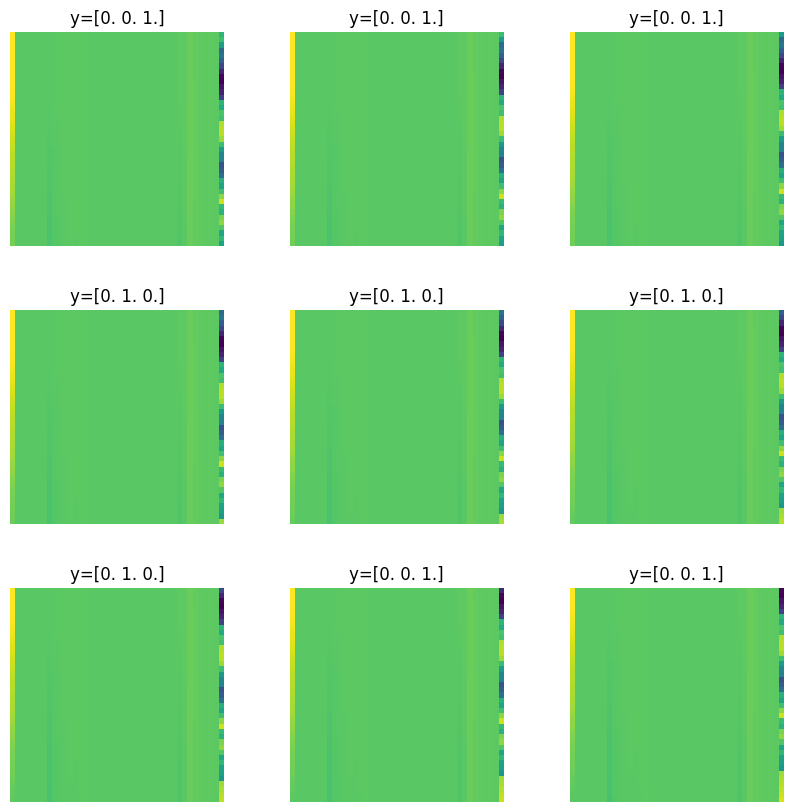

In [302]:
import matplotlib.pyplot as plt

# n为batch大小，这里设为9
n = 9

# 生成一个九宫格的画布
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

# 遍历batch中的每一个样本，依次画出对应的矩阵和标注
for i in range(n):
    # 获取当前样本的矩阵和标注
    x = Xs[i]
    y = ys[i]

    # 在对应的子图上画出矩阵和标注
    axs[i//3, i%3].imshow(x)
    axs[i//3, i%3].set_title('y={}'.format(y))
    axs[i//3, i%3].axis('off')

# 调整子图之间的距离
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# 显示画布
plt.show()


In [303]:
X_test = Xs[-500:] #最後40天features當作test資料
X_train,y_train = Xs[:-500],ys[:-500] #其他當作訓練
print(X_train.shape,y_train.shape,X_test.shape)

(12362, 41, 41, 1) (12362, 3) (500, 41, 41, 1)


In [304]:
X_train2維 = X_train.reshape(X_train.shape[0],-1)
y_train數字 = np.array([ np.argmax(i) for i in y_train])
print(X_train2維.shape)
print(y_train數字.shape)

from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler()
X_train平衡 ,y_train平衡 = ros.fit_resample(X_train2維 ,y_train數字)
print(pd.DataFrame(y_train平衡)[0].value_counts().sort_index())#顯示結果

X_train = X_train平衡.reshape(X_train平衡.shape[0],41,41,1)#資料數,15,15,1
y_train = y_train平衡.reshape(y_train平衡.shape[0],1)#資料數,1
y_train = to_categorical(y_train , num_classes = 3)#one_hot
print(X_train.shape)
print(y_train.shape)

(12362, 1681)
(12362,)
0    2604
1    2604
2    2604
Name: 0, dtype: int64
(7812, 41, 41, 1)
(7812, 3)


In [305]:
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(
    X_train,
    y_train,
    test_size = 0.2,
    random_state = 42,
    shuffle = True,#是否洗牌
    stratify = y_train #是否根據y欄位做分層取樣
    )
print(xtrain.shape, ytrain.shape, xval.shape, yval.shape)

(6249, 41, 41, 1) (6249, 3) (1563, 41, 41, 1) (1563, 3)


In [306]:
pd.Series([np.argmax(i) for i in ys]).value_counts()

0    6172
2    4071
1    2619
dtype: int64

In [307]:
pd.Series([np.argmax(i) for i in y_train]).value_counts()

0    2604
1    2604
2    2604
dtype: int64

In [308]:
pd.Series([np.argmax(i) for i in ytrain]).value_counts()

1    2083
0    2083
2    2083
dtype: int64

In [309]:
pd.Series([np.argmax(i) for i in yval]).value_counts()

1    521
2    521
0    521
dtype: int64

In [310]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


input_shape = (41, 41, 1)

# 創建一個序列模型
model = Sequential()

# 添加第一個卷積層，使用32個3x3的卷積核，使用ReLU激活函數，並指定輸入形狀
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))

# 添加第二個卷積層，使用64個3x3的卷積核，使用ReLU激活函數
model.add(Conv2D(64, (3, 3), activation='relu'))

# 添加第三個卷積層，使用128個3x3的卷積核，使用ReLU激活函數
model.add(Conv2D(128, (3, 3), activation='relu'))

# 添加第四個卷積層，使用256個3x3的卷積核，使用ReLU激活函數
model.add(Conv2D(256, (3, 3), activation='relu'))

# 添加平坦層，將卷積層的輸出展開為一維數組
model.add(Flatten())

# 添加dropout層，防止過度擬合
model.add(Dropout(0.5))

# 添加全連接層，使用softmax激活函數，輸出3個類別
model.add(Dense(3, activation='softmax'))

# 編譯模型，使用交叉熵損失函數和Adam優化器
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 打印模型結構
model.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 39, 39, 32)        320       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 35, 35, 128)       73856     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 33, 33, 256)       295168    
_________________________________________________________________
flatten_7 (Flatten)          (None, 278784)            0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 278784)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                

In [311]:

es = EarlyStopping(monitor='val_accuracy',#驗證集acc
                   min_delta=0.00001,
                   patience=20,
                   mode='max',
                   restore_best_weights=True)#恢復最佳權重

In [313]:
history = model.fit(
    xtrain,
    ytrain,
    batch_size = 256,
    epochs = 300,
    validation_data=(xval,yval),
    verbose=1,callbacks=[es]
    )

Epoch 1/300
25/25 [==============================] - ETA: 0s - loss: 1.0454 - accuracy: 0.38 - ETA: 45s - loss: 1.0599 - accuracy: 0.382 - ETA: 1:01 - loss: 1.0667 - accuracy: 0.37 - ETA: 1:05 - loss: 1.0669 - accuracy: 0.37 - ETA: 1:06 - loss: 1.0655 - accuracy: 0.37 - ETA: 1:05 - loss: 1.0639 - accuracy: 0.37 - ETA: 1:03 - loss: 1.0630 - accuracy: 0.38 - ETA: 1:00 - loss: 1.0621 - accuracy: 0.38 - ETA: 57s - loss: 1.0611 - accuracy: 0.3941 - ETA: 54s - loss: 1.0582 - accuracy: 0.403 - ETA: 51s - loss: 1.0560 - accuracy: 0.409 - ETA: 48s - loss: 1.0533 - accuracy: 0.409 - ETA: 45s - loss: 1.0507 - accuracy: 0.411 - ETA: 42s - loss: 1.0535 - accuracy: 0.412 - ETA: 38s - loss: 1.0485 - accuracy: 0.417 - ETA: 35s - loss: 1.0458 - accuracy: 0.421 - ETA: 32s - loss: 1.0427 - accuracy: 0.426 - ETA: 29s - loss: 1.0411 - accuracy: 0.428 - ETA: 25s - loss: 1.0408 - accuracy: 0.428 - ETA: 21s - loss: 1.0404 - accuracy: 0.432 - ETA: 18s - loss: 1.0378 - accuracy: 0.436 - ETA: 13s - loss: 1.0374 

In [ ]:
#!pip install tensorflow==2.2.0

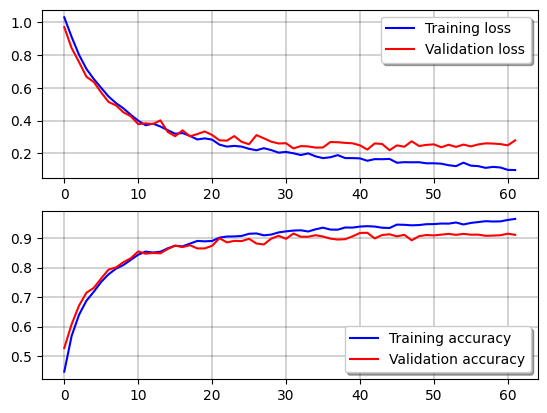

In [314]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
ax[0].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[1].legend(loc='best', shadow=True)

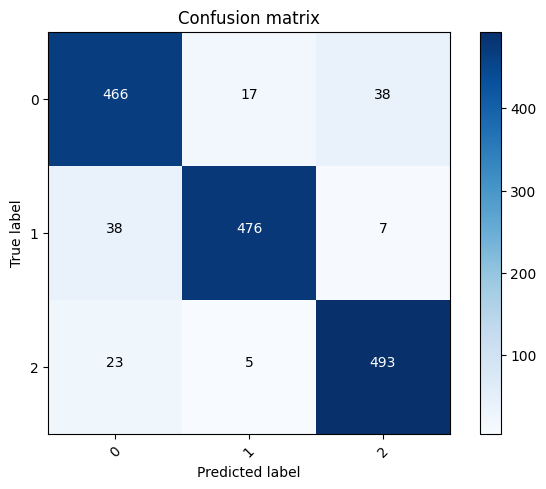

In [315]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#預測的y
ypred_onehot = model.predict(xval)
#轉換預測的y: [0 0 1 0 0 ...] --> 2
ypred = np.argmax(ypred_onehot,axis=1)
#轉換真實的y
ytrue = np.argmax(yval,axis=1)
#計算 confusion matrix
confusion_mtx = confusion_matrix(ytrue, ypred)
#畫出 confusion matrix
nclasses = 3
plot_confusion_matrix(confusion_mtx, classes=range(nclasses))

In [316]:
from sklearn.metrics import classification_report
y_pred = model.predict(xval)
y_pred = [np.argmax(i) for i in y_pred]
y_pred = to_categorical(y_pred, num_classes = 3)
target_names = ['Hold','BUY','SELL']
print(classification_report(yval,y_pred,target_names=target_names))

              precision    recall  f1-score   support

        Hold       0.88      0.89      0.89       521
         BUY       0.96      0.91      0.93       521
        SELL       0.92      0.95      0.93       521

   micro avg       0.92      0.92      0.92      1563
   macro avg       0.92      0.92      0.92      1563
weighted avg       0.92      0.92      0.92      1563
 samples avg       0.92      0.92      0.92      1563



In [317]:
def val_acc(yval,y_pred):
    t = []
    for i,j in zip(yval,y_pred):
        t.append(np.allclose(i,j))
    return np.mean(t)
val_acc(yval,y_pred)

0.9181062060140754

500
[*********************100%***********************]  1 of 1 completed


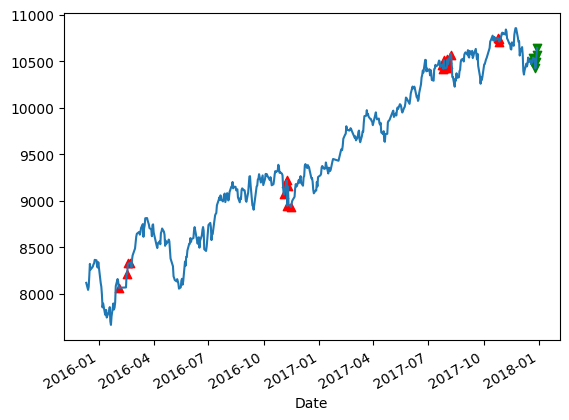

In [328]:
import pandas as pd
import yfinance as yf
answer = model.predict(X_test)
answer = [ np.argmax(i) for i in answer]
print(len(answer))
C = pd.DataFrame()
C['Close'] = yf.download(y_symbol, start = startdate,end = enddate)['Close']
C['SIGNAL'] = 0
C = C.tail(len(answer))
C['SIGNAL'] = answer
buy = C[C['SIGNAL']==1]['Close']
sell = C[C['SIGNAL']==2]['Close']
C['Close'].plot()
plt.scatter(list(buy.index),list(buy.values),color='red',marker="^")
plt.scatter(list(sell.index),list(sell.values),color='green',marker="v")

In [329]:
import pandas as pd
# Set the float_format option to not use scientific notation
pd.set_option('display.float_format', '{:.4f}'.format)
np.set_printoptions(suppress=True)
C['HOLD%'] = model.predict(X_test)[:,0]
C['BUY%'] = model.predict(X_test)[:,1]
C['SELL%'] = model.predict(X_test)[:,2]
C.drop(['SIGNAL'],axis=1).tail(20)

,Close,HOLD%,BUY%,SELL%
Date,,,,
2017-12-04,10651.1104,0.9343,0.0014,0.0643
2017-12-05,10566.8496,0.9820,0.0033,0.0147
2017-12-06,10393.9199,0.9906,0.0050,0.0044
2017-12-07,10355.7598,0.9864,0.0049,0.0087
2017-12-08,10398.6201,0.9172,0.0022,0.0806
2017-12-11,10473.0898,0.8666,0.0014,0.1320
2017-12-12,10443.2803,0.8104,0.0004,0.1892
2017-12-13,10470.7002,0.7765,0.0004,0.2231
2017-12-14,10538.0098,0.6182,0.0002,0.3816


In [330]:
model.save('./model1.h5')
#del model
from tensorflow.keras.models import load_model
model = load_model('./model1.h5')
predict = model.predict(X_test)
predict[-5:]

array([[0.24910806, 0.00021195, 0.7506799 ],
       [0.23990151, 0.00016331, 0.75993514],
       [0.30046222, 0.0000967 , 0.6994411 ],
       [0.24425732, 0.00010358, 0.7556391 ],
       [0.39937913, 0.00021003, 0.6004108 ]], dtype=float32)

In [331]:
import yfinance as yf
import numpy as np
import pandas as pd
import keras
from tensorflow.keras.models import load_model
import pickle
import matplotlib.pyplot as plt
#from finta import TA
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pickle

# 下載台灣加權指數資料
ticker = '^TWII'
start_date = '2018-01-01'#從訓練資料沒有包括的時間開始做回測
end_date = '2023-02-26'#設置回測結束日期
#df = yf.download(ticker, start=start_date, end=end_date)

# 載入Model和Scaler
model = load_model('./model1.h5')
with open('./scaler1.pkl', 'rb') as f:
    scaler = pickle.load(f)

ret = triple_barrier_signal(twii[~date_arr].values.tolist(),漲幅,跌幅,持有時間)
df = dataset.tail(len(ret))
features = list(df.columns)
df['triple_barrier_signal'] = ret

df = df.dropna()
y_name = 'triple_barrier_signal' #當作labels
#df = df[features+[y_name]]

df_minmax = df.copy()
df_minmax[features] = scaler.fit_transform(df_minmax[features])#縮放到0-1之間
df_minmax = pd.DataFrame(df_minmax, columns=df.columns, index=df.index) 

df_minmax

C:\Users\USER\anaconda3\envs\Python_3.7\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,MACD1,RSIb,RSIb2,RSIb3,RSIb4,RSIb5,RSIb6,KDb,KDb2,KDb3,...,LS0,LS1,ADXR0,ADXR1,ADXR2,ADXR3,ADXR4,ADXR5,return,triple_barrier_signal
date,,,,,,,,,,,,,,,,,,,,,
2018-01-11 09:00:00,0.6715,0.6568,0.6375,0.6461,0.6557,0.6588,0.6613,0.9025,0.4870,0.3163,...,0.7832,0.6978,0.2854,0.1715,0.3278,0.4631,0.4992,0.4910,0.6344,0
2018-01-11 10:00:00,0.6711,0.6336,0.6214,0.6336,0.6443,0.6478,0.6508,0.9013,0.4979,0.3180,...,0.7814,0.6979,0.2815,0.1734,0.3280,0.4620,0.4993,0.4915,0.6676,0
2018-01-11 11:00:00,0.6705,0.6213,0.6128,0.6269,0.6382,0.6419,0.6452,0.8995,0.5093,0.3191,...,0.7789,0.6974,0.2765,0.1750,0.3280,0.4610,0.4993,0.4919,0.6741,0
2018-01-11 12:00:00,0.6699,0.6253,0.6156,0.6291,0.6402,0.6439,0.6471,0.8976,0.5207,0.3202,...,0.7766,0.6968,0.2721,0.1767,0.3280,0.4600,0.4994,0.4923,0.6705,0
2018-01-11 13:00:00,0.6693,0.6249,0.6153,0.6289,0.6400,0.6437,0.6469,0.8959,0.5317,0.3212,...,0.7740,0.6963,0.2683,0.1783,0.3282,0.4589,0.4994,0.4928,0.6743,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-30 09:00:00,0.5531,0.5104,0.5082,0.5179,0.5327,0.5410,0.5537,0.7093,0.3622,0.1713,...,0.8069,0.5493,0.1957,0.1268,0.1740,0.1968,0.3658,0.7661,0.6725,0
2022-03-30 10:00:00,0.5573,0.5502,0.5365,0.5392,0.5521,0.5598,0.5719,0.7138,0.3676,0.1741,...,0.8100,0.5564,0.1954,0.1238,0.1738,0.1962,0.3648,0.7653,0.5480,0
2022-03-30 11:00:00,0.5604,0.5381,0.5278,0.5324,0.5458,0.5537,0.5659,0.7173,0.3727,0.1768,...,0.8113,0.5630,0.1946,0.1207,0.1736,0.1956,0.3637,0.7645,0.5651,0


In [332]:
#特徵欄位
#features = df.drop(y_name,axis=1).columns.tolist()
# 製作X
days = 41
start_index = 0
end_index = len(df_minmax)-days
Xs = []
indexs = []
for i in tqdm(range(start_index ,end_index+1 ,1)):
    X = df_minmax.iloc[i:i+days,:][features]
    X = np.array(X)
    Xs.append(X)
    indexs.append((df_minmax.iloc[[i]].index,df_minmax.iloc[[i+days-1]].index))
Xs = np.array(Xs)

100%|██████████| 5090/5090 [00:03<00:00, 1490.26it/s]


In [333]:
print(Xs.shape)
Xs = Xs.reshape(-1,days,len(features),1)
print(Xs.shape)

(5090, 41, 41)
(5090, 41, 41, 1)


In [334]:
# 模型預測
answer = model.predict(Xs)
answer = [ np.argmax(i) for i in answer]

for i in range(3):
    print(f"{i}: {answer.count(i)}")

0: 5090
1: 0
2: 0


In [335]:


# 回測框架參考自CHATGPT
# https://shareg.pt/wQwSsaA
'''
我希望請你做代碼補全的工作規則如下:
1.#字號後面為註解
2.<you codeing here> 代表要請你輸入代碼
以下是第一個我請你幫忙補全的代碼:
def backtest(df, model, scaler,ub,lb,t):
    signals = process(df,scaler,model) #signals是一個list元素有0,1,2分別代表pass,buy,sell
    df = df.tail(len(signals)) #dataframe代表股價歷史資料
    # 以下請幫我對df做遍歷根據signals進行BUY跟SELL來做模擬交易回測
    # 其中止盈賣出價格 = 進場價格*ub, 止損價格 = 進場價格*lb
    # 當持有時間超過t個時間點也需要將股票賣出
    <you codeing here>
'''
df = twii[~date_arr]
signals = answer
df_minmax = df_minmax.iloc[-len(Xs):,:]
index = df_minmax.index
capital = 1000000  # 初始資本
hold = False  # 是否持有股票
entry_price = 0  # 進場價格
entry_idx = 0  # 進場時間點
exit_price = 0  # 出場價格
exit_idx = 0  # 出場時間點
t = 15
lb = 0.97
ub = 1.03
capital_history = []
for i, signal in enumerate(signals):
    if signal == 1 and not hold:  # 進場買入
        hold = True
        entry_price = df.iloc[i]
        entry_idx = i
    elif signal == 2 and hold:  # 出場賣出
        hold = False
        exit_price = df.iloc[i]
        exit_idx = i
        # 計算交易結果
        shares = capital // entry_price
        profit = shares * (exit_price - entry_price)
        capital += profit
        print('買入時間:', df.index[entry_idx])
        print('買入價格:', entry_price)
        print('賣出時間:', df.index[exit_idx])
        print('賣出價格:', exit_price)
        print('獲利:', profit)
    elif hold and (i - entry_idx >= t or df.iloc[i]<= entry_price * lb or df.iloc[i] >= entry_price * ub):  # 到達出場條件
        hold = False
        exit_price = df.iloc[i]
        exit_idx = i
        # 計算交易結果
        shares = capital // entry_price
        profit = shares * (exit_price - entry_price)
        capital += profit
        print('買入時間:', df.index[entry_idx])
        print('買入價格:', entry_price)
        print('賣出時間:', df.index[exit_idx])
        print('賣出價格:', exit_price)
        print('獲利:', profit)
    capital_history.append(capital)

最終報酬率:+0.0%
最大虧損:-0.0%


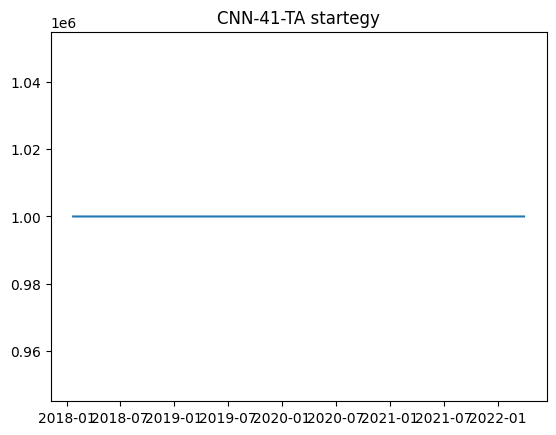

In [336]:
plt.plot(index,capital_history)
plt.title('CNN-41-TA startegy')
print(f"最終報酬率:+{(capital_history[-1]/capital_history[0]-1)*100}%")
print(f"最大虧損:{-(1-min(capital_history)/capital_history[0])*100}%")